In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
import os

## Prepare data

In [2]:
data = pd.read_csv(os.path.join(os.getcwd(), 'banknote_authentication.txt'), names=['variance', 'skewness', 'curtosis',
                                                                                    'entropy', 'class'])

In [3]:
data.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [4]:
X = data.drop('class', axis=1)
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.11, random_state=1)
print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(1098, 4) (136, 4) (138, 4)
(1098,) (136,) (138,)


In [5]:
X_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
X_val = X_scaler.transform(X_val)
X_test = X_scaler.transform(X_test)
y_train = y_train.values.reshape(-1, 1)
y_val = y_val.values.reshape(-1,)
y_test = y_test.values.reshape(-1,)

In [6]:
def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [1000$]')
    plt.plot(history.epoch, np.array(history.history['loss']),
           label='Train Loss')
    plt.plot(history.epoch, np.array(history.history['val_loss']),
           label = 'Val loss')
    plt.legend()

In [7]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True)
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Models

In [14]:
model = keras.Sequential([
    keras.layers.Dense(4, input_shape=(4,), kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Activation('relu'),
    keras.layers.Dense(1, kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Activation('sigmoid')
])
optimizer = tf.train.AdamOptimizer(0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
activation_2 (Activation)    (None, 4)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
_________________________________________________________________
activation_3 (Activation)    (None, 1)                 0         
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [16]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')

In [17]:
history = model.fit(X_train, y_train, epochs=1000, validation_data=[X_val, y_val], callbacks=[early_stop])

Train on 1098 samples, validate on 136 samples
Epoch 1/1000
1098/1098 [==============================] - 1s 884us/step - loss: 0.6856 - acc: 0.6239 - val_loss: 0.6963 - val_acc: 0.6176
Epoch 2/1000
1098/1098 [==============================] - 0s 339us/step - loss: 0.6636 - acc: 0.6639 - val_loss: 0.6782 - val_acc: 0.6250
Epoch 3/1000
1098/1098 [==============================] - 0s 351us/step - loss: 0.6440 - acc: 0.6922 - val_loss: 0.6619 - val_acc: 0.6471
Epoch 4/1000
1098/1098 [==============================] - 0s 368us/step - loss: 0.6260 - acc: 0.7104 - val_loss: 0.6467 - val_acc: 0.6544
Epoch 5/1000
1098/1098 [==============================] - 0s 424us/step - loss: 0.6089 - acc: 0.7395 - val_loss: 0.6321 - val_acc: 0.6985
Epoch 6/1000
1098/1098 [==============================] - 0s 421us/step - loss: 0.5923 - acc: 0.7787 - val_loss: 0.6174 - val_acc: 0.7426
Epoch 7/1000
1098/1098 [==============================] - 0s 335us/step - loss: 0.5759 - acc: 0.8087 - val_loss: 0.6027 - val

1098/1098 [==============================] - 0s 446us/step - loss: 0.1932 - acc: 0.9809 - val_loss: 0.2235 - val_acc: 0.9779
Epoch 60/1000
1098/1098 [==============================] - 0s 345us/step - loss: 0.1927 - acc: 0.9809 - val_loss: 0.2225 - val_acc: 0.9779
Epoch 61/1000
1098/1098 [==============================] - 0s 407us/step - loss: 0.1922 - acc: 0.9809 - val_loss: 0.2219 - val_acc: 0.9779
Epoch 62/1000
1098/1098 [==============================] - 0s 352us/step - loss: 0.1918 - acc: 0.9809 - val_loss: 0.2210 - val_acc: 0.9779
Epoch 63/1000
1098/1098 [==============================] - 0s 418us/step - loss: 0.1913 - acc: 0.9800 - val_loss: 0.2206 - val_acc: 0.9779
Epoch 64/1000
1098/1098 [==============================] - 0s 367us/step - loss: 0.1910 - acc: 0.9781 - val_loss: 0.2198 - val_acc: 0.9779
Epoch 65/1000
1098/1098 [==============================] - 0s 412us/step - loss: 0.1905 - acc: 0.9781 - val_loss: 0.2189 - val_acc: 0.9779
Epoch 66/1000
1098/1098 [================

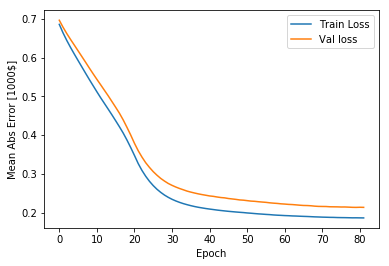

In [18]:
plot_history(history)

In [19]:
pred = np.round(model.predict(X_test).reshape(-1,))
accuracy_score(pred, y_test)

0.9782608695652174

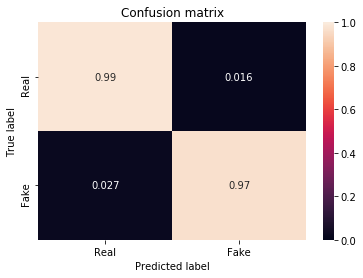

In [20]:
mat = confusion_matrix(pred, y_test)
cm = mat / np.sum(mat, axis=1)
plot_confusion_matrix(cm, classes=['Real', 'Fake'])

In [21]:
weights = model.get_weights()
np.save('relu_weights', weights, allow_pickle=True)